In [1]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import load_workload_data as ld
import load_benchmark_data as be
import matplotlib.pyplot as plt

In [2]:
# Init
sns.set()
sns.set(rc={'figure.figsize':(30,16)})
sns.set(font_scale=5)
plt.tight_layout()
workloads: Path = Path("../data/workloads/")

def plot_stacked(data: DataFrame, x: str, y: str, hue: str, hue_order: List[str]=None):
    df_plottable: DataFrame = data.groupby([x, hue])[y].sum().reset_index().pivot(columns=hue, index=x, values=y)
    if hue_order:
        assert sorted(hue_order) == sorted(list(df_plottable))
        df_plottable = df_plottable[hue_order]
    df_plottable.plot(kind="bar", stacked=True)
    plt.ylabel(y)

def plot_workload(workload_folder: Path):
    df = ld.get_workload_data(workload_folder)
    order: List[str] = ["TABLE_SCAN", "JOIN", "AGGREGATE", "PROJECTION"]
    order_filtered = [operator for operator in order if operator in list(df[ld.OPERATOR_TYPE])]
    plot_stacked(data=df, x=ld.DATA_TYPE, y=ld.RUNTIME_S, hue=ld.OPERATOR_TYPE, hue_order=order_filtered)

<Figure size 2160x1152 with 0 Axes>

Processing table_scans
Processing projections
Processing aggregates
Processing joins


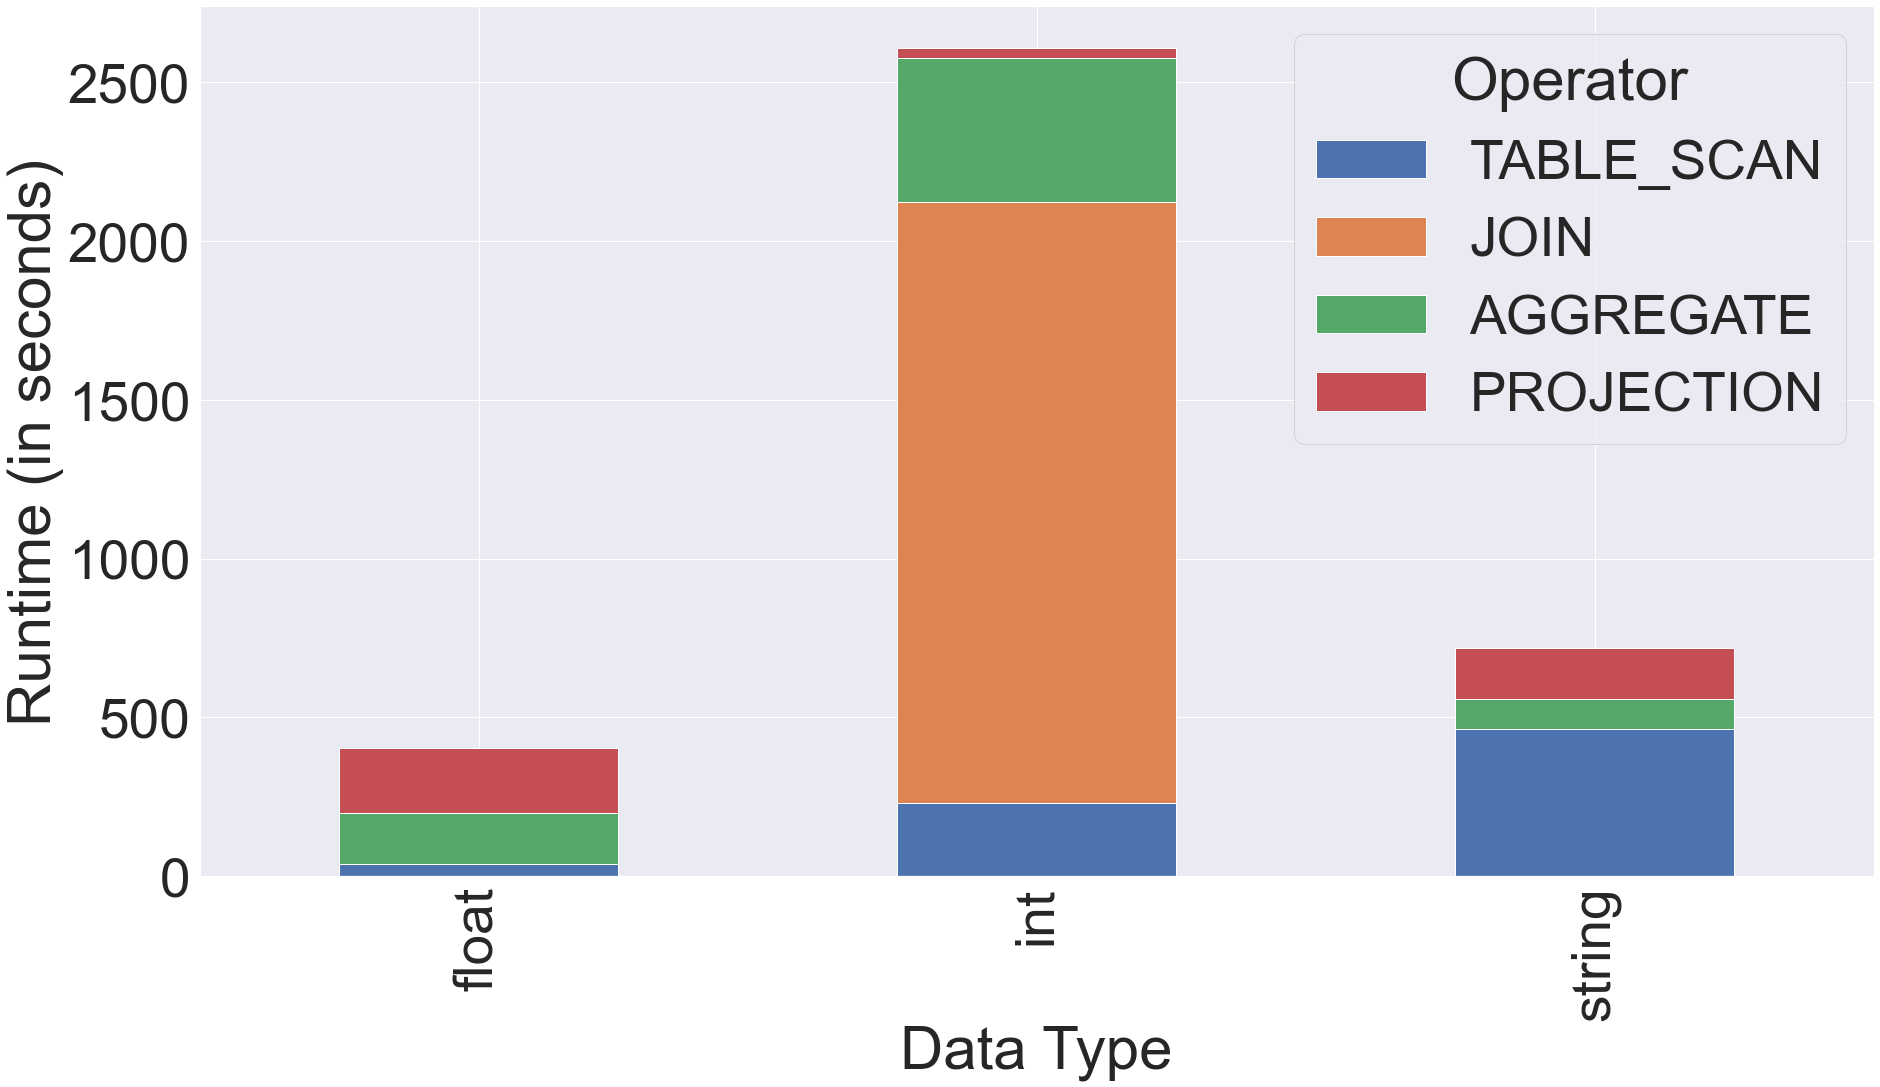

In [3]:
test = plot_workload(workloads / "TPC-H")
plt.savefig("visualizations/tpch-workload.svg", bbox_inches = "tight")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


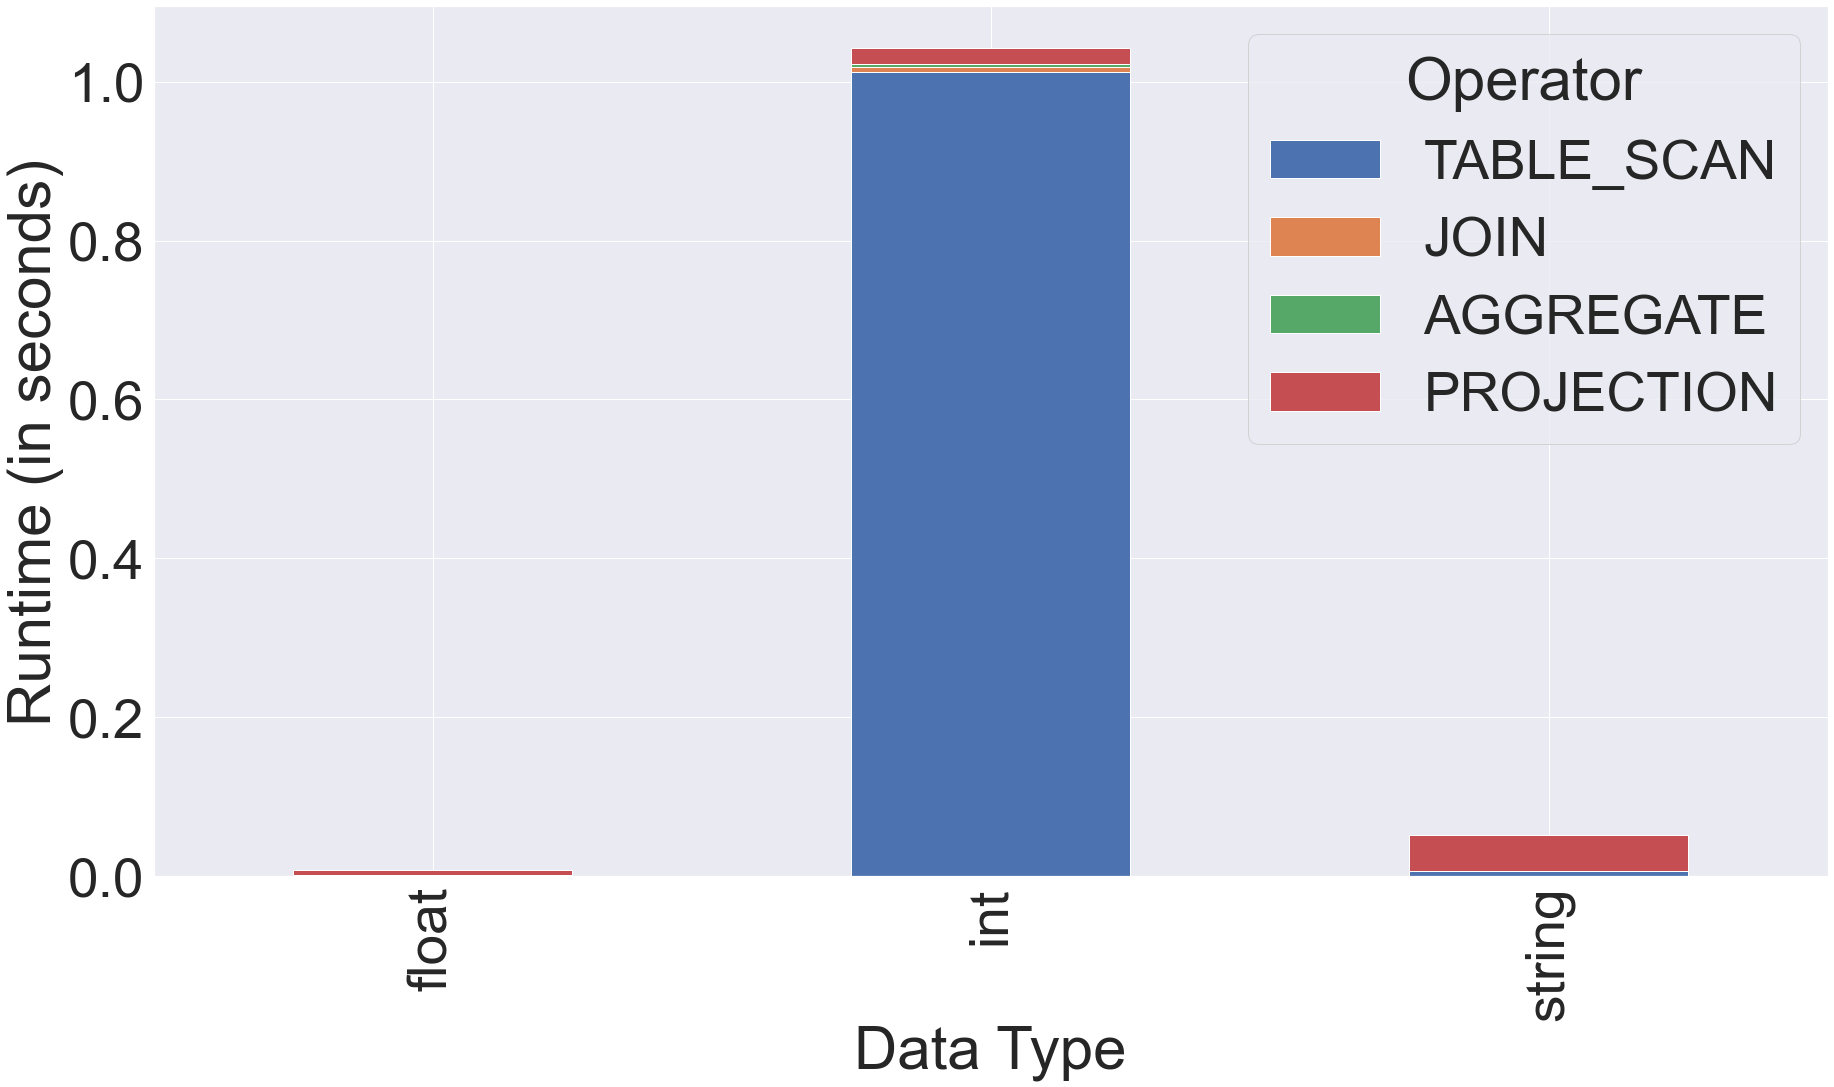

In [4]:
plot_workload(workloads / "TPC-C")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


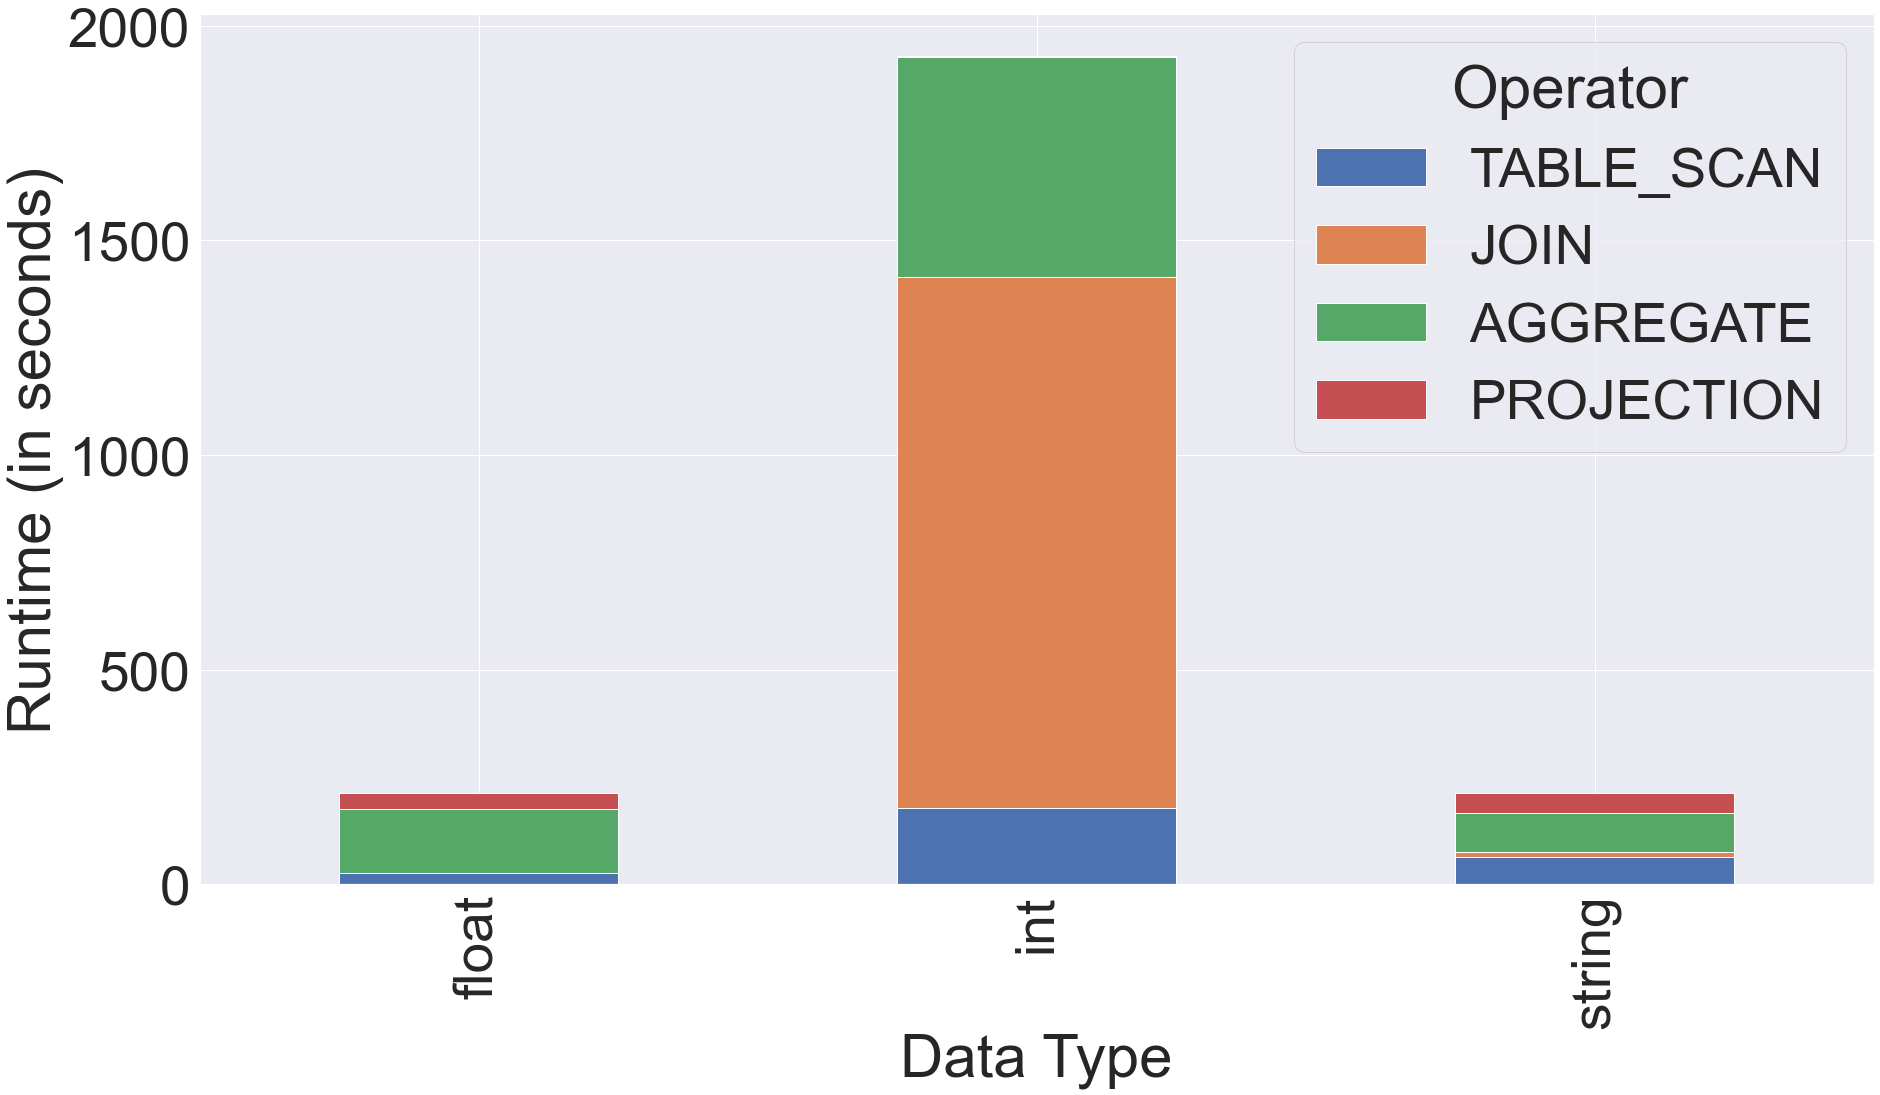

In [5]:
plot_workload(workloads / "TPC-DS")
plt.savefig("visualizations/tpcds-workload.svg", bbox_inches = "tight")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


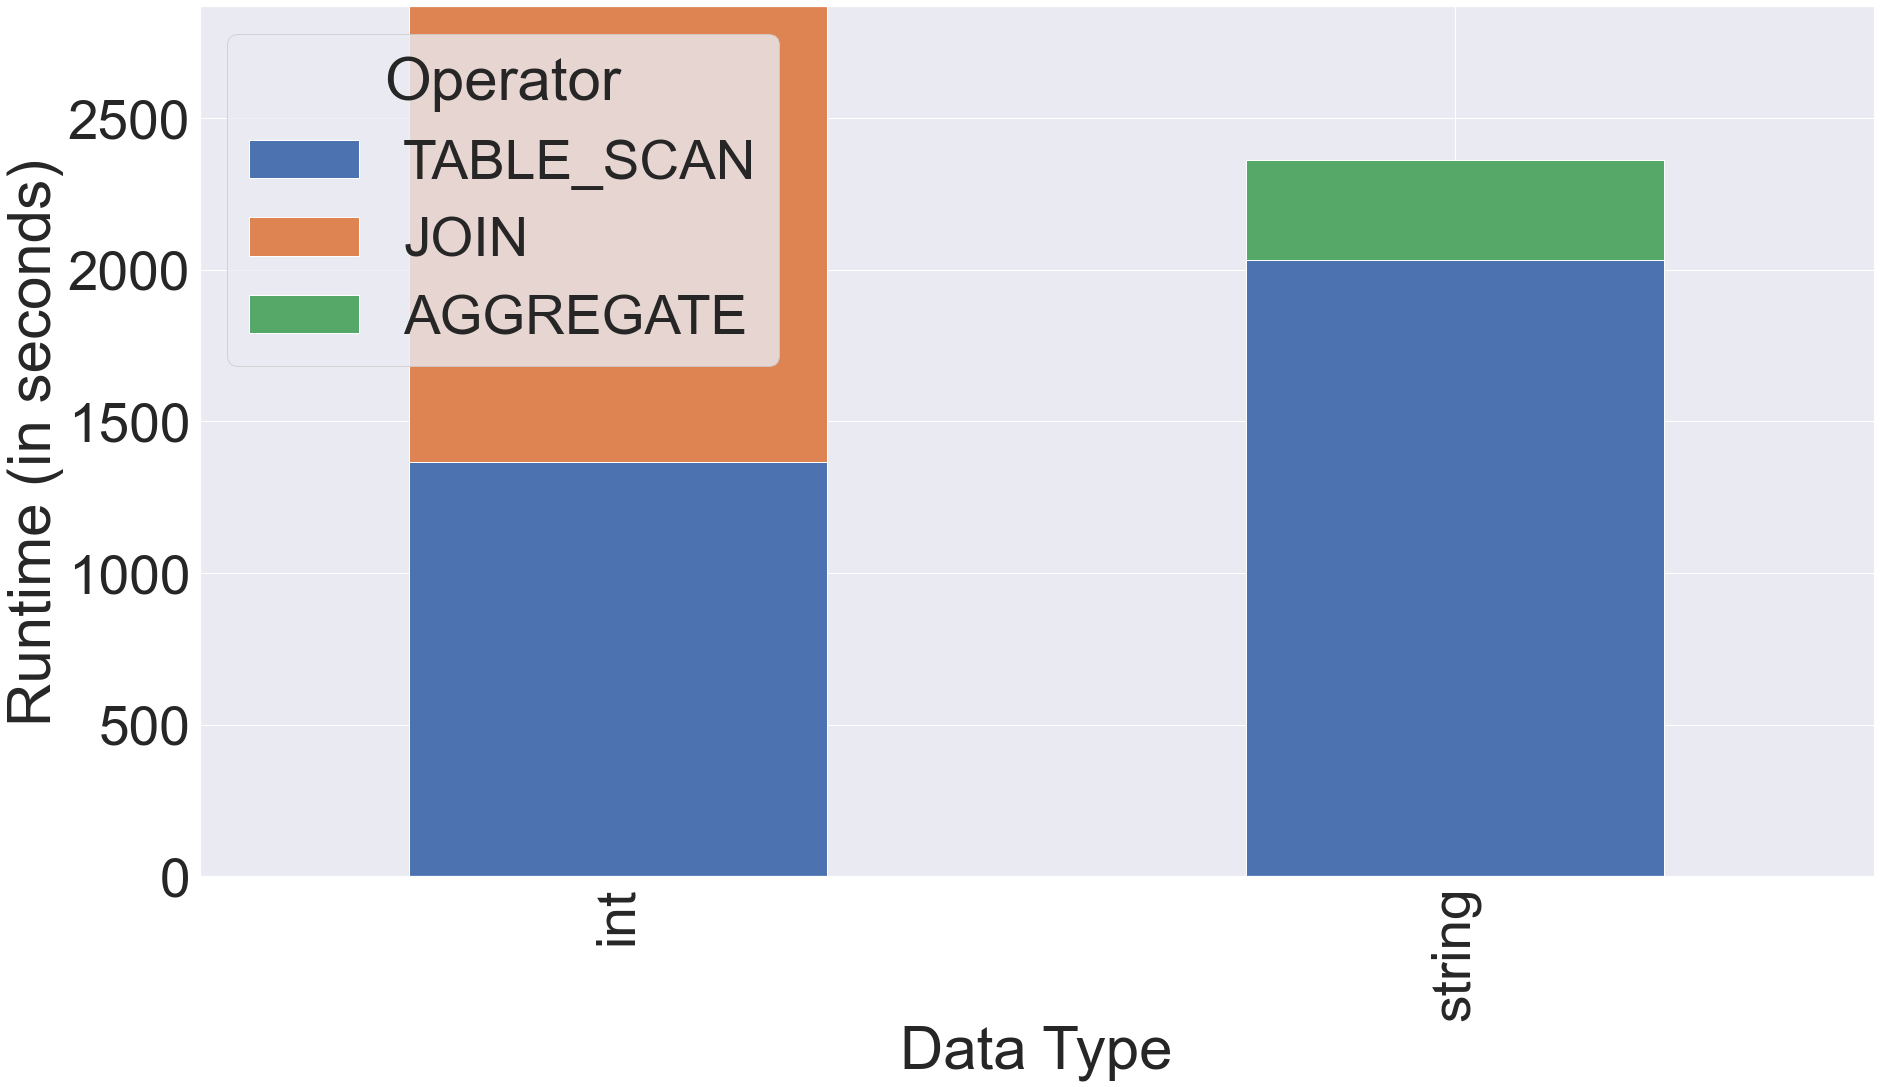

In [6]:
plot_workload(workloads / "Join Order Benchmark")
plt.savefig("visualizations/jo_workload.svg", bbox_inches = "tight")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


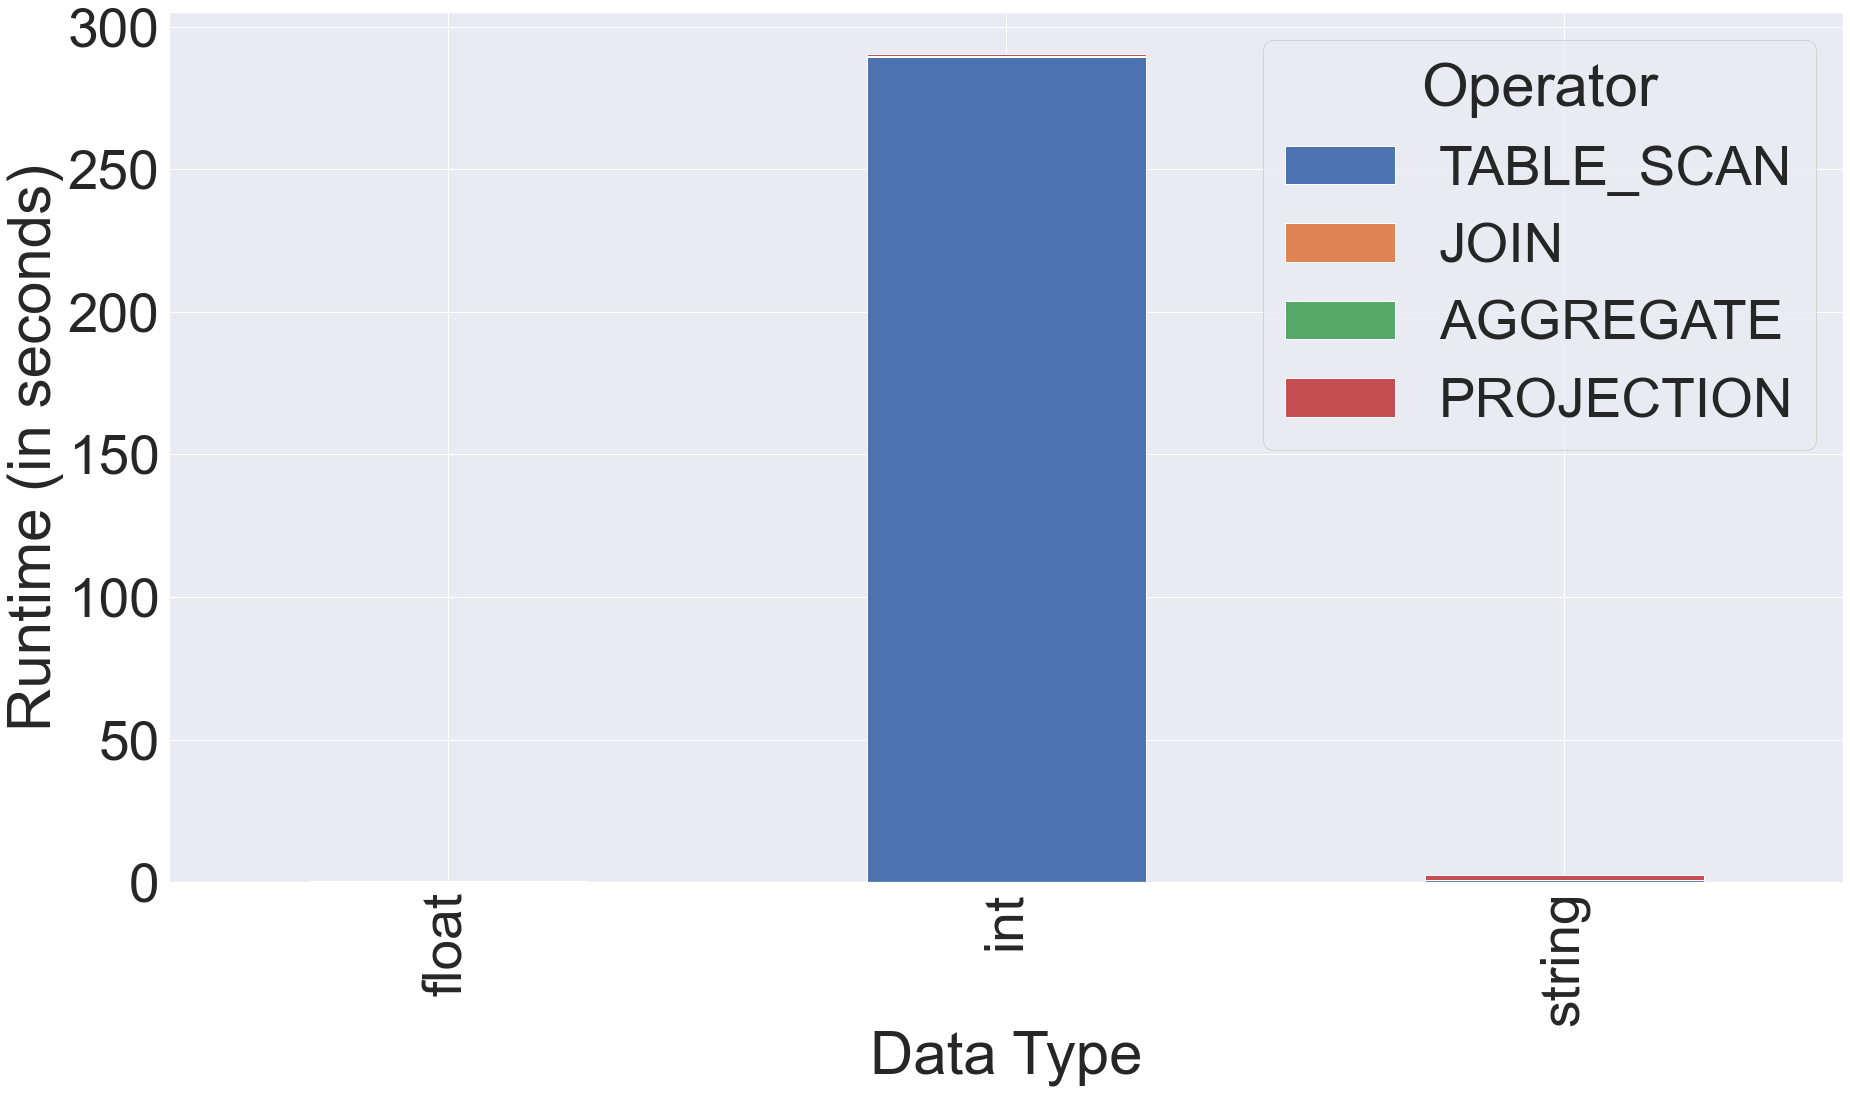

In [7]:
plot_workload(workloads / "CH-benCHmark")

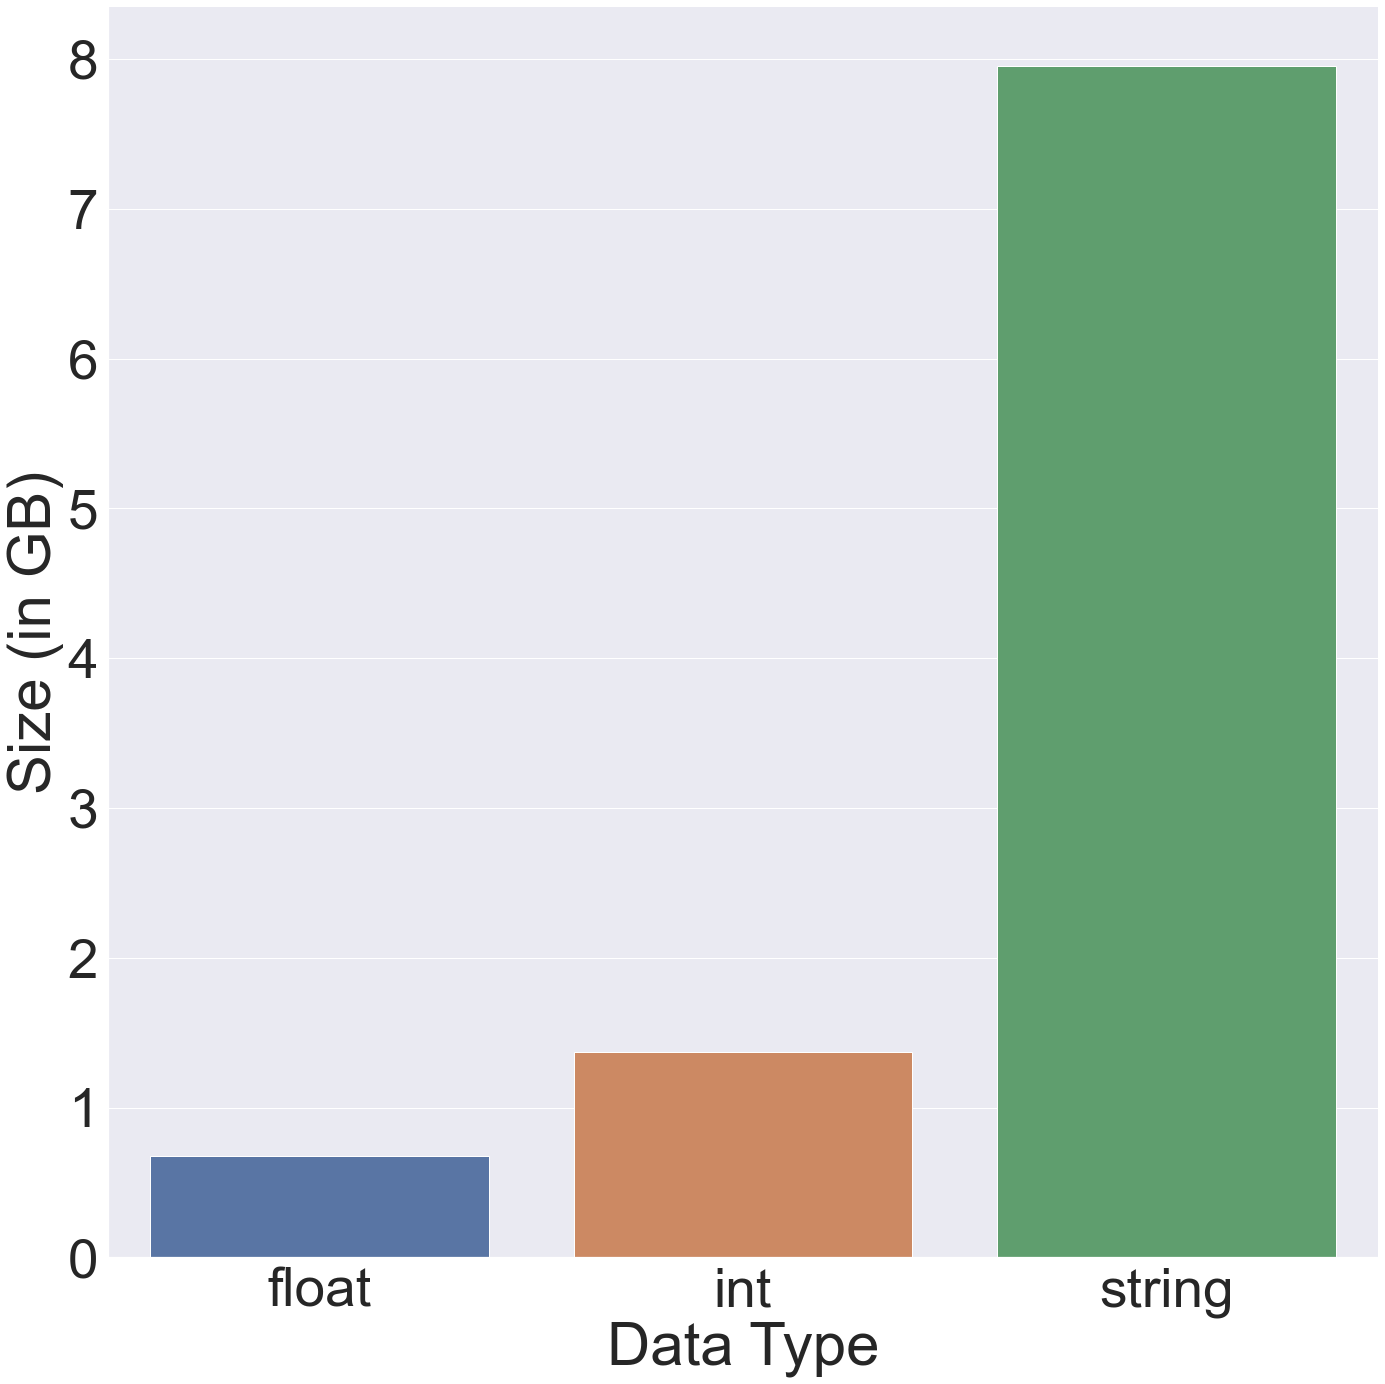

In [8]:
def plot_sizes(sizes_file: Path, benchmark_name: str):
    sizes: DataFrame = be.load_sizes(sizes_file)
    accumulated: DataFrame = sizes.groupby([be.DATA_TYPE], as_index=False)[be.SIZE_IN_GB].sum()
    x_order: List[str] = sorted(accumulated[be.DATA_TYPE])
    sns.catplot(data=accumulated, x=be.DATA_TYPE, y=be.SIZE_IN_GB, kind="bar", order=x_order, height=20)
    plt.savefig(f"visualizations/sizes_{benchmark_name}.svg", bbox_inches = "tight")
plot_sizes(Path("../data/tpch_singlethreaded/sizes_Dictionary.txt"), "tpch")

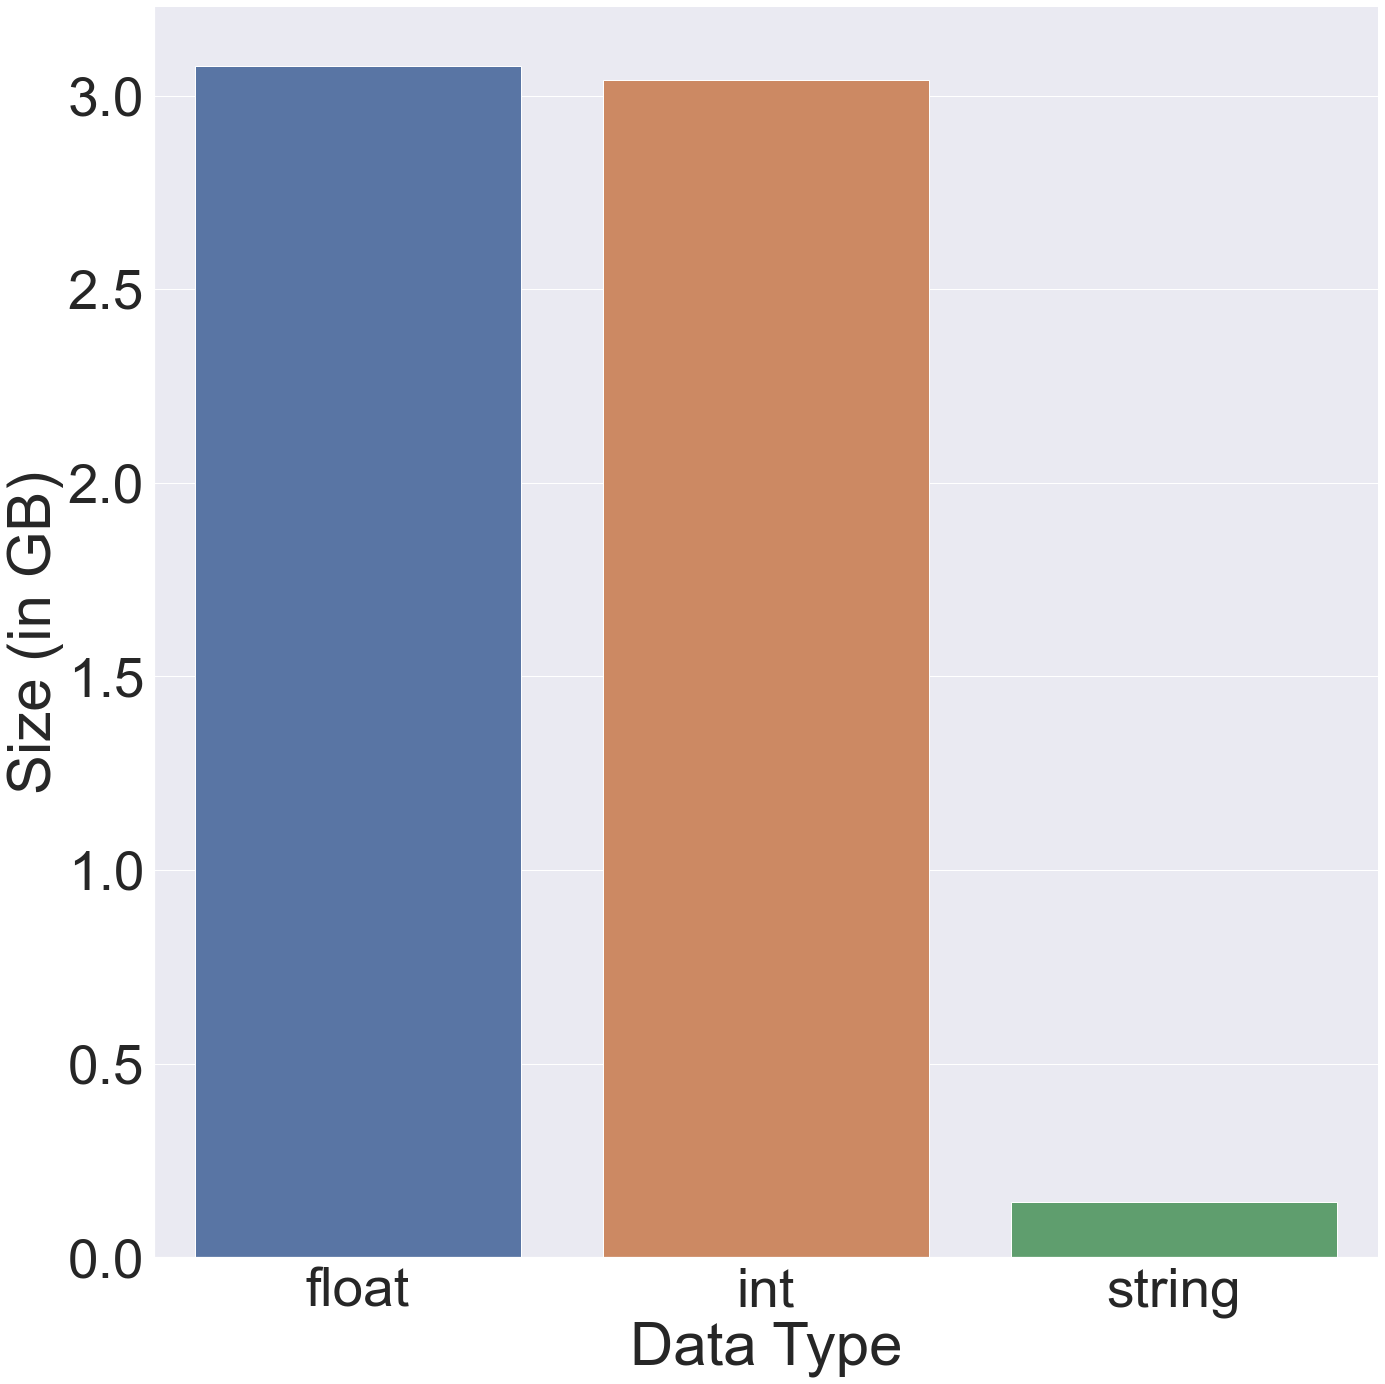

In [9]:
plot_sizes(Path("../data/tpcds_singlethreaded/sizes_Dictionary.txt"), "tpcds")

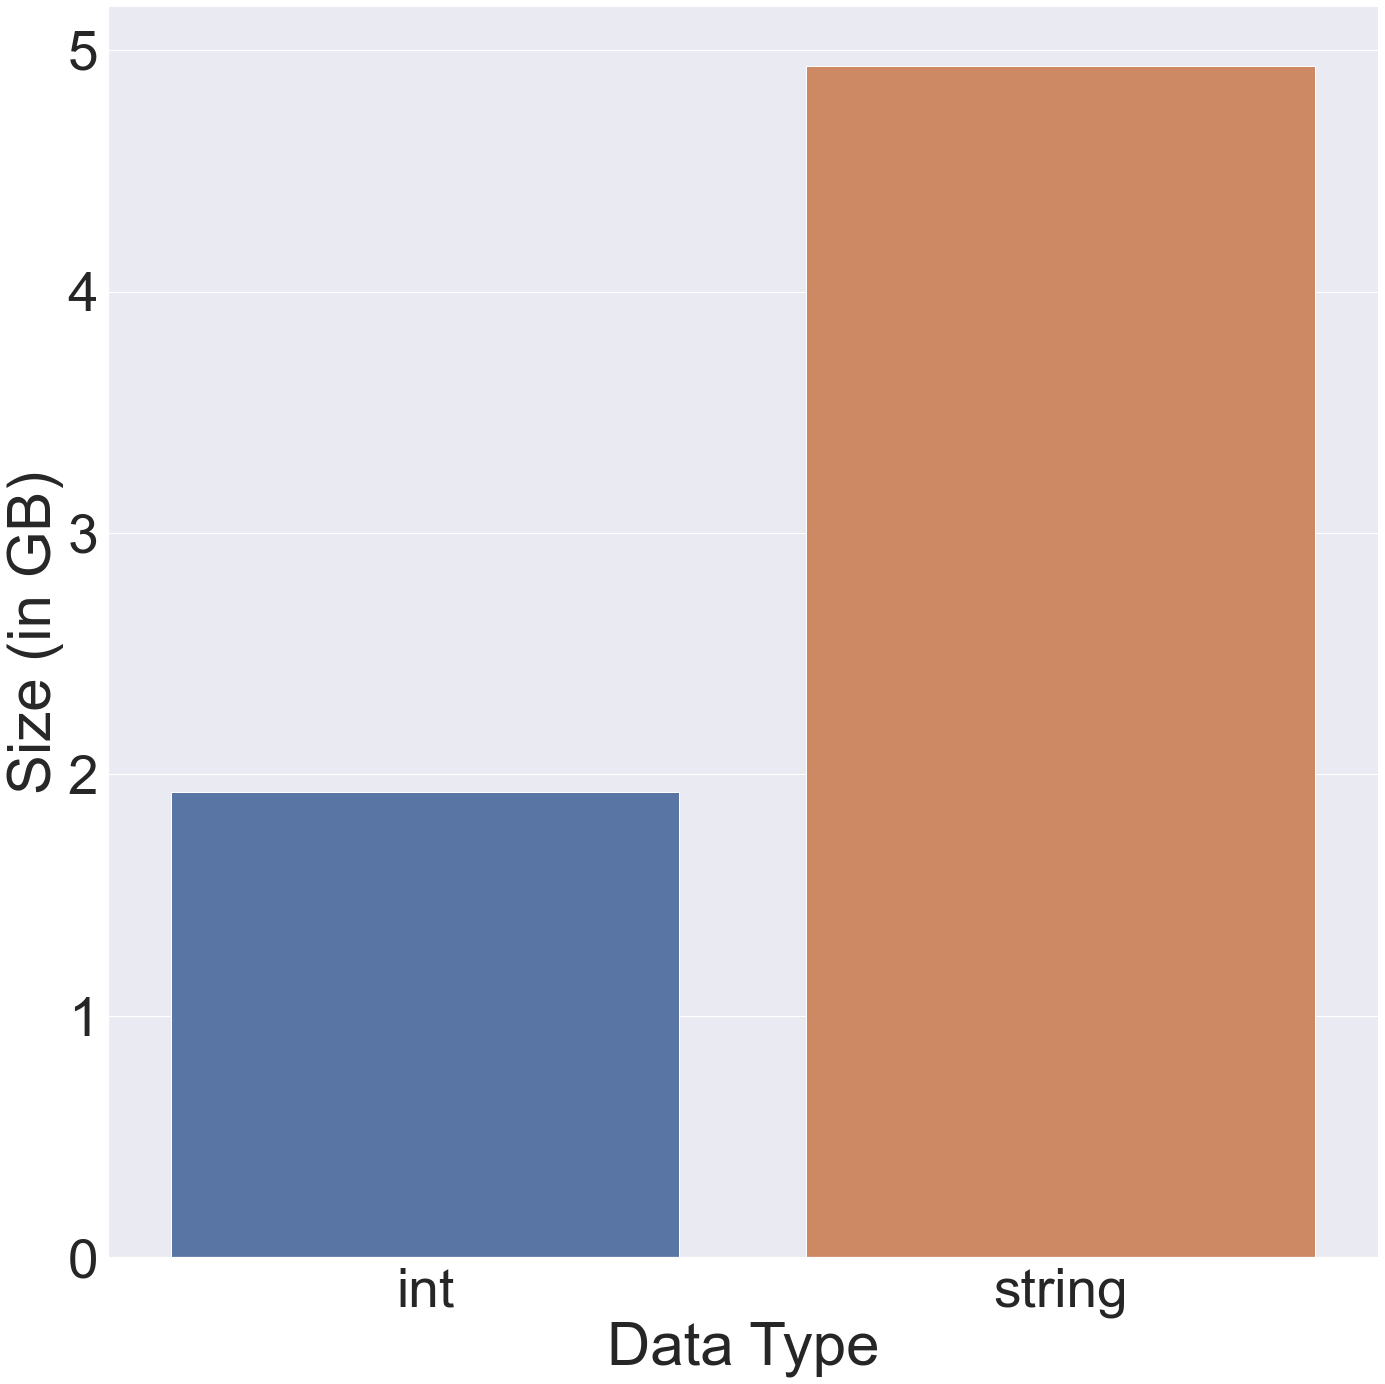

In [10]:
plot_sizes(Path("../data/jo_singlethreaded/sizes_Dictionary.txt"), "jo")
